In [1]:
# Group Assignment Multivariate Econometrics Fall 2020

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [3]:
plt.style.use('/home/luuk/Documents/MNRAS_Style.mplstyle')

In [33]:
# Read in the Excel file with the data
df = pd.read_excel('./MVE_assignment_2020_dataset.xlsx')
countries = ['Netherlands','Norway', 'Thailand', 'South Africa']
# Select from df only those for our countries
df = df[df['cntry.name'].apply(lambda x: x in countries)]
# Drop columns that are irrelevant (ISO names of countries)
df = df.drop(['ISO_N3','ISO_C3'],axis=1)
# Set index to increase readability
df.columns = ['Country','Year','Precipitation','Radiation','Average Temp','GDP','GDP per Capita','Population','Land','CPI']
df = df.set_index(['Country','Year'])
# Replace '..' with nans to avoid problems
df = df.replace('..',np.nan)

In [34]:
corr_NO = df.loc['Norway'].corr()
corr_TH = df.loc['Thailand'].corr()
corr_SA = df.loc['South Africa'].corr()
corr_NL = df.loc['Netherlands'].corr()

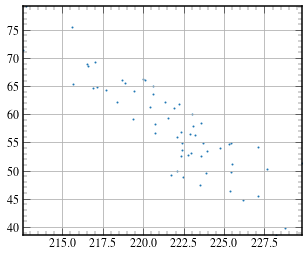

In [35]:
plt.scatter(df.loc['South Africa'].Radiation,df.loc['South Africa'].Precipitation,s=1)

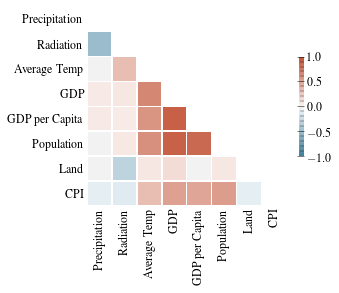

In [36]:
corr_mat = 0
for i,country in enumerate(countries):
    try:
        corr_mat += df.loc[country].corr()
    except:
        corr_mat = df.loc[country].corr()
    
corr = corr_mat/4
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(axis='x', which='minor', bottom=False, top=False)
ax.tick_params(axis='x', which='major', bottom=False, top=False)
ax.tick_params(axis='y', which='minor', length=0)
ax.tick_params(axis='y', which='major', length=0)
plt.tight_layout()
plt.savefig('Correlogram.pdf')

In [37]:
# Available data:
# Mean precipitation
# Mean radiation
# Average yearly temperaure
# GDP
# GDP per capita
# Population, total
# Agricultural land
# Crop production index

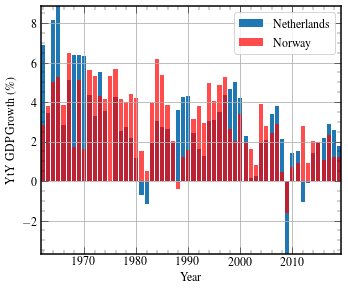

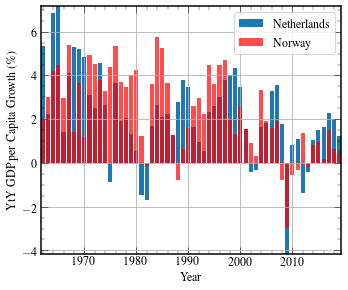

In [38]:
class simple_figures():
    def __init__(self):
        self.df = df
    
    def GPD_Growth(self):
        fig, ax = plt.subplots()
        GDP_Growth = df['GDP'].unstack().T.pct_change()*100
        ax.bar(GDP_Growth.index,GDP_Growth.Netherlands,label='Netherlands',alpha=1)
        ax.bar(GDP_Growth.index,GDP_Growth.Norway, label='Norway',alpha=0.7,color='red')

        ax.set_xlabel('Year')
        ax.set_ylabel('YtY GDP Growth (\%)')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
    def GPDpC_Growth(self):
        fig, ax = plt.subplots()
        GDP_Growth = df['GDP per Capita'].unstack().T.pct_change()*100
        ax.bar(GDP_Growth.index,GDP_Growth.Netherlands,label='Netherlands',alpha=1)
        ax.bar(GDP_Growth.index,GDP_Growth.Norway, label='Norway',alpha=0.7, color='red')

        ax.set_xlabel('Year')
        ax.set_ylabel('YtY GDP per Capita Growth (\%)')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
        
        
figs = simple_figures()
figs.GPD_Growth()
figs.GPDpC_Growth()

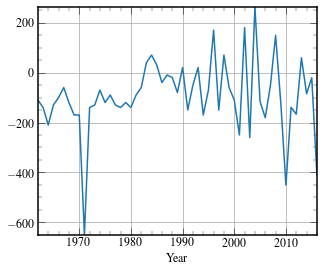

In [16]:
class preprocessing():
    def __init__(self):
        self.demean()
        self.stationary(df)
        self.detrend()
        return
        
    def demean(self):
        """Group by country and subtract mean of each column
           from the data. This will enhance the visibility of 
           outliers"""
        self.demeaned = df  - df.groupby('Country').mean()
        
    def loglevels(self):
        """Simply take the logarithm of all levels"""
        self.log = np.log(df)
        
    def stationary(self,df):
        """To detrend the data we check for each timeseries
           if it is stationary or not. This function returns 
           for each country and column the p value for the ADF
           test"""
        stationary_results = pd.DataFrame()
        for country in countries:
            # loop through countries
            subdf = df.loc[country]
            for col in subdf.columns:
                # Run ADF test to check for stationarity
                ADF_p = adfuller(subdf[col].dropna())[1]
                stationary_results.loc[country,col] = ADF_p
        self.stationary_results = stationary_results
        # Low p values are stationary
        self.isstationary = stationary_results<0.05
        
    def detrend(self):
        """If it is not stationary we should take the difference 
           sequence. If time series is stationary, we can keep the
           original"""
        # The non-stationary timeseries are detrended by taking diff series
        not_stationary = ['Average Temp','GDP','GDP per Capita',
                          'Population','Land','CPI']
        self.detrended = df.copy()
        for col in not_stationary:
            self.detrended[col+'_detrended'] = df[col].unstack().T.diff().T.stack()
        return

preprocessed = preprocessing()
#preprocessed.isstationary
#preprocessed.detrended['GDP_detrended'].values
preprocessed.detrended.loc['Netherlands'].Land_detrended.plot()

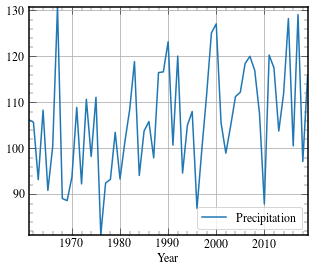

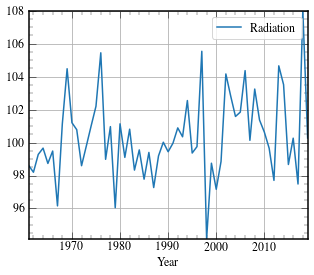

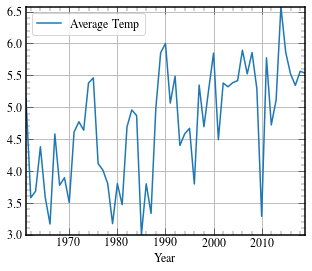

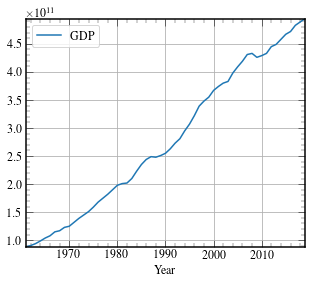

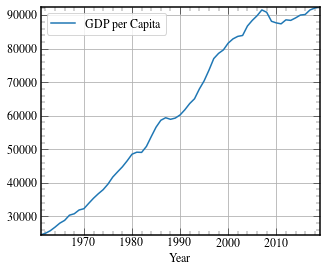

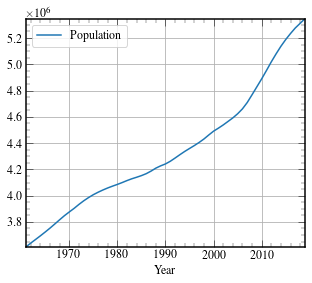

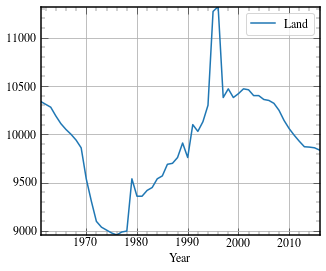

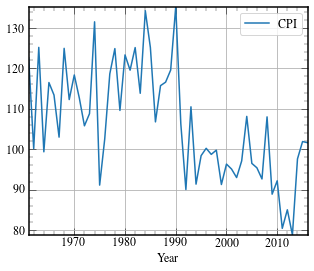

In [9]:
# Preprocessing
df.loc['Norway'].reset_index().plot(x='Year',y='Precipitation')
df.loc['Norway'].reset_index().plot(x='Year',y='Radiation')
df.loc['Norway'].reset_index().plot(x='Year',y='Average Temp')
df.loc['Norway'].reset_index().plot(x='Year',y='GDP')
df.loc['Norway'].reset_index().plot(x='Year',y='GDP per Capita')
df.loc['Norway'].reset_index().plot(x='Year',y='Population')
df.loc['Norway'].reset_index().plot(x='Year',y='Land')
df.loc['Norway'].reset_index().plot(x='Year',y='CPI')

In [12]:
sns.pairplot(preprocessed.detrended.loc['Norway'].reset_index().dropna(),corner=True)
plt.show()

RuntimeError: latex was not able to process the following string:
b'Average Temp_detrended'

Here is the full report generated by latex:
latex: /usr/local/lib/libtiff.so.5: no version information available (required by /usr/lib/x86_64-linux-gnu/libpoppler.so.73)
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/luuk/.cache/matplotlib/tex.cache/4cf0b7255bd984a7086bf715ae6324e1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./4cf0b7255bd984a7086bf715ae6324e1.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily Average Temp_
                             detrended}
No pages of output.
Transcript written on 4cf0b7255bd984a7086bf715ae6324e1.log.




RuntimeError: latex was not able to process the following string:
b'Average Temp_detrended'

Here is the full report generated by latex:
latex: /usr/local/lib/libtiff.so.5: no version information available (required by /usr/lib/x86_64-linux-gnu/libpoppler.so.73)
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/luuk/.cache/matplotlib/tex.cache/4cf0b7255bd984a7086bf715ae6324e1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./4cf0b7255bd984a7086bf715ae6324e1.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily Average Temp_
                             detrended}
No pages of output.
Transcript written on 4cf0b7255bd984a7086bf715ae6324e1.log.




<Figure size 2700x2700 with 120 Axes>

<h3>Analysis of the order of integration</h3>

In [10]:
# As before, we first apply a simple DF test to identify stationarity
stationary_results = pd.DataFrame()
for country in countries:
    # loop through countries
    subdf = df.loc[country]
    for col in subdf.columns:
        # Run ADF test to check for stationarity
        ADF_p = adfuller(subdf[col].dropna())[1]
        stationary_results.loc[country,col] = ADF_p
stationary_results = stationary_results
# Low p values are stationary
isstationary = stationary_results<0.05
isstationary = isstationary.T
isstationary

,Netherlands,Norway,Thailand,South Africa
Precipitation,True,True,True,True
Radiation,True,True,False,True
Average Temp,True,False,False,False
GDP,False,False,False,False
GDP per Capita,False,False,True,False
Population,False,False,False,False
Land,False,False,False,False
CPI,False,False,False,False


In [14]:
# Order of integration: 
# which difference series make the series stationary?

Time series processes whose $d^{th}$ difference have a stationary, invertible ARMA(p,q) representation are called integrated processes of order $d$, $I(d)$. The corresponding representation

$$\alpha (L) \Delta^d x_t = \mu + \theta(L) \epsilon_t$$

This representation is called the ARIMA(p,d,q) model

In [15]:
# Thus for each non stationary series we test order 1,2 and 3 difference sequence

In [16]:
def delta_operator(x):
    return np.diff(x)
x = np.arange(0,10,1)

In [29]:
integratability = pd.DataFrame()
for country in countries:
    # loop through countries
    subdf = df.loc[country]
    for col in subdf.columns:
        timeseries = subdf[col].dropna()
        # Run ADF test to check for stationarity on original series
        ADF_c_p = adfuller(timeseries, regression='c')[1]
        ADF_ct_p = adfuller(timeseries, regression='ct')[1]
        ADF_nc_p = adfuller(timeseries, regression='nc')[1]

        KPSS_p = kpss(timeseries)[1]
        integratability = integratability.append({'Country': country, 
                                                      'OoI': 0, 
                                                      'Series':col,
                                                      'pval_ADF_c': ADF_c_p<0.05,
                                                      'pval_ADF_ct': ADF_ct_p<0.05,
                                                      'pval_ADF_nc': ADF_nc_p<0.05,
                                                      'pval_KPSS': KPSS_p>0.05}, ignore_index=True)
        # Take dth difference sequence (1,2,3)
        for OoI in [1,2,3]:
            timeseries = delta_operator(timeseries)
            ADF_c_p = adfuller(timeseries, regression='c')[1]
            ADF_ct_p = adfuller(timeseries, regression='ct')[1]
            ADF_nc_p = adfuller(timeseries, regression='nc')[1]
            KPSS_p = kpss(timeseries)[1]
            # For each diff series we test obtain ADF pvalue for stationarity
            integratability = integratability.append({'Country': country, 
                                                      'OoI': OoI, 
                                                      'Series':col,
                                                      'pval_ADF_c': ADF_c_p<0.05,
                                                      'pval_ADF_ct': ADF_ct_p<0.05,
                                                      'pval_ADF_nc': ADF_nc_p<0.05,
                                                      'pval_KPSS': KPSS_p>0.05}, ignore_index=True)
integratability = integratability.set_index(['Country','OoI','Series']).unstack()

/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattoo

/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:16

In [32]:
(integratability.loc['Norway']).T.astype(bool)

OoI                           0.0    1.0   2.0    3.0
            Series                                   
pval_ADF_c  Average Temp    False   True  True   True
            CPI             False   True  True   True
            GDP             False   True  True   True
            GDP per Capita  False   True  True   True
            Land            False   True  True   True
            Population      False  False  True   True
            Precipitation    True   True  True   True
            Radiation        True   True  True   True
pval_ADF_ct Average Temp     True   True  True   True
            CPI              True   True  True   True
            GDP             False   True  True   True
            GDP per Capita  False   True  True   True
            Land            False   True  True   True
            Population      False  False  True  False
            Precipitation    True   True  True   True
            Radiation        True   True  True   True
pval_ADF_nc Average Temp    False   True  True   True
            CPI             False   True  True   True
            GDP             False  False  True   True
            GDP per Capita  False   True  True   True
            Land            False   True  True   True
            Population      False  False  True   True
            Precipitation   False   True  True   True
            Radiation       False   True  True   True
pval_KPSS   Average Temp    False   True  True   True
            CPI              True   True  True   True
            GDP             False   True  True   True
            GDP per Capita  False   True  True   True
            Land             True   True  True   True
            Population      False   True  True   True
            Precipitation   False   True  True   True
            Radiation        True   True  True   True

<h3>Make figures</h3>

In [18]:
from astropy.io import ascii
df = ascii.read('./data_CO2').to_pandas()

In [19]:
df.columns=['Year','CO2_excess']

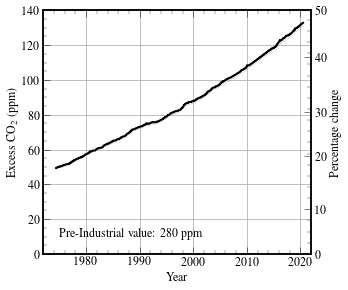

In [26]:
fig,ax = plt.subplots()
ax.plot(df.Year, df.CO2_excess,color='black',lw=2)
ax.set_xlabel('Year')
ax.set_ylabel(r'Excess CO$_2$ (ppm)')
ax.set_ylim(0,140)
ax.set_xlim(1972,2022)
plt.annotate("Pre-Industrial value: 280 ppm",xy=(1975,10))
ax2 = ax.twinx()
ax2.plot(df.Year, df.CO2_excess,color='black',lw=0.1)
ax2.set_ylim(0,140)
ticks = ax.get_yticks()
ax2.set_yticks([0,26,57,83,115,142])
ax2.set_yticklabels([0,10,20,30,40,50])
ax2.set_ylabel('Percentage change')
ax2.grid(None)
plt.tight_layout()

plt.savefig('ExcessCO2.pdf')

In [28]:
df = ascii.read('./HadCRUT.4.6.0.0.annual_ns_avg.txt').to_pandas()


In [29]:
df2 = ascii.read('./GLB.Ts+dSST.txt').to_pandas()

In [30]:
df3=pd.read_csv('1880-2019.csv')
df3

,Year,Value
0,1880,-0.12
1,1881,-0.09
2,1882,-0.10
3,1883,-0.18
4,1884,-0.27
...,...,...
135,2015,0.93
136,2016,1.00
137,2017,0.91
138,2018,0.83


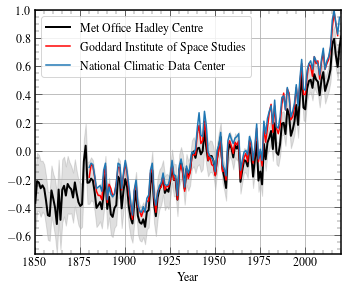

In [31]:
fig,ax = plt.subplots()
ax.plot(df.col1, df.col2,color='black',lw=2,label='Met Office Hadley Centre')
ax.plot(df2.col20.iloc[1:-1].astype(float).values,df2.col14.iloc[1:-1].astype(float).values/100,label='Goddard Institute of Space Studies',color='red')
ax.plot(df3.Year, df3.Value,label='National Climatic Data Center')
ax.set_xlabel('Year')
ax.fill_between(df.col1, df.col11,df.col12,color='grey',alpha=0.25)
#ax.set_ylabel(r'Excess CO$_2$ (ppm)')
#ax.set_ylim(0,140)
#ax.set_xlim(1972,2022)
#plt.annotate("Pre-Industrial value: 280 ppm",xy=(1975,10))
plt.legend()
plt.tight_layout()
plt.savefig('Temp_increase.pdf')

KeyError: 'Netherlands'

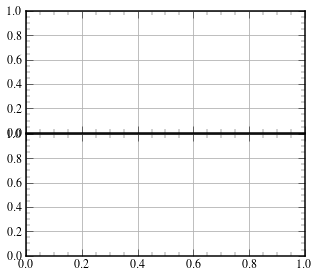

In [32]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(5,4.5),sharex=True)
for country in countries:
    normed_GDP = df.loc[country]['GDP'] / df.loc[country]['GDP'].loc[1961]*100
    ax1.plot(df.loc[country].index, normed_GDP,label=country)
ax1.set_ylabel('GDP (1961=100%)')
ax1.set_ylim(75,1200)
ax1.legend()    
for country in countries:
    normed_pop = df.loc[country]['Population'] / df.loc[country]['Population'].loc[1961]*100
    ax2.plot(df.loc[country].index, normed_pop,label=country)
ax2.set_ylabel('Population (1961=100%)')
plt.tight_layout(pad=0)
ax2.set_xlabel('Year')
ax2.set_ylim(85,349)
plt.savefig('GDP_Population_Growth.pdf')

(40.0, 160.0)

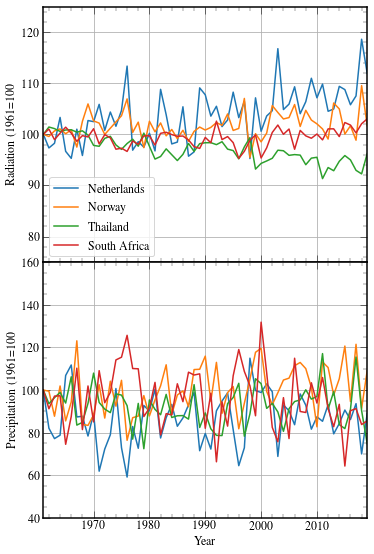

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(5,7.3),sharex=True)
for country in countries:
    normed_GDP = df.loc[country]['Radiation'] / df.loc[country]['Radiation'].loc[1961]*100
    ax1.plot(df.loc[country].index, normed_GDP,label=country)
ax1.set_ylabel('Radiation (1961=100%)')
ax1.set_ylim(75,125)
ax1.legend()    
for country in countries:
    normed_pop = df.loc[country]['Precipitation'] / df.loc[country]['Precipitation'].loc[1961]*100
    ax2.plot(df.loc[country].index, normed_pop,label=country)
ax2.set_ylabel('Precipitation (1961=100%)')
plt.tight_layout(pad=0)
ax2.set_xlabel('Year')
ax2.set_ylim(40,160)
#plt.savefig('GDP_Population_Growth.pdf')

In [68]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)



In [69]:
adf_test(df.loc['Norway']['Precipitation'])

kpss_test(df.loc['Norway']['Precipitation'])

Results of Dickey-Fuller Test:
Test Statistic                -7.011918e+00
p-value                        6.886737e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.824674
p-value                  0.010000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [59]:
print(adfuller(df.loc['Norway']['Precipitation'],regression = 'c')[1])
print(adfuller(df.loc['Norway']['Precipitation'],regression = 'ct')[1])
print(adfuller(df.loc['Norway']['Precipitation'],regression = 'nc')[1])

6.88673694336291e-10
1.92755298431946e-11
0.8489276296428533


In [60]:
print(adfuller(df.loc['Netherlands']['Precipitation'],regression = 'c')[1])
print(adfuller(df.loc['Netherlands']['Precipitation'],regression = 'ct')[1])
print(adfuller(df.loc['Netherlands']['Precipitation'],regression = 'nc')[1])

2.4842757038791176e-08
3.5009016324789816e-07
0.5108046214516685


In [61]:
print(adfuller(df.loc['Thailand']['Precipitation'],regression = 'c')[1])
print(adfuller(df.loc['Thailand']['Precipitation'],regression = 'ct')[1])
print(adfuller(df.loc['Thailand']['Precipitation'],regression = 'nc')[1])

4.9475641568622464e-09
1.1431571471034737e-07
0.45920050235038334


In [62]:
print(adfuller(df.loc['South Africa']['Precipitation'],regression = 'c')[1])
print(adfuller(df.loc['South Africa']['Precipitation'],regression = 'ct')[1])
print(adfuller(df.loc['South Africa']['Precipitation'],regression = 'nc')[1])

2.189270375714459e-08
1.7290506544751244e-07
0.49981613513559336


In [53]:
startval = 0
values = np.zeros(int(1e5))
epsilon = np.random.randn(int(1e5))*0.5
for i in range(len(values)-1):
    values[i+1] = 0.910*values[i] + epsilon[i]

In [55]:
adfuller(values)

(-55.795747549663986,
 0.0,
 9,
 99990,
 {'1%': -3.430415401218969,
  '5%': -2.861568906314114,
  '10%': -2.56678538581951},
 144705.21020720975)

In [40]:
from matplotlib import cm
cmap = cm.get_cmap('Accent',8)
cmap = cmap(np.arange(0,8))

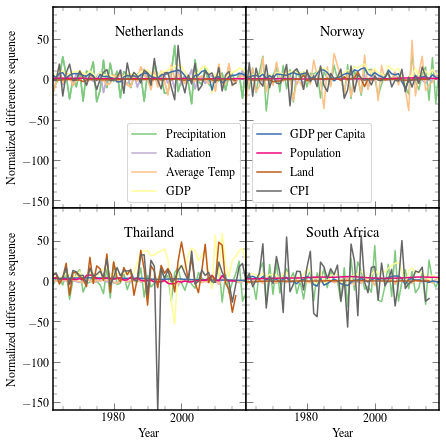

In [42]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(6,6))
for ax_iter,country in enumerate(countries):
    ax = [ax1,ax2,ax3,ax4][ax_iter]
    for col_iter,col in enumerate(df.columns):
        normed = np.diff(df.loc[country][col] / df.loc[country][col].loc[1961]*100)
        if (col_iter<4)&(ax_iter==0):
            ax.plot(df.loc[country].index.values[1:], normed,color=cmap[col_iter],label=col)
        if (col_iter>=4)&(ax_iter==1):
            ax.plot(df.loc[country].index.values[1:], normed,color=cmap[col_iter],label=col)

        else:
            ax.plot(df.loc[country].index.values[1:], normed,color=cmap[col_iter])    
    ax.set_title(country,x=0.5,y=0.83)
    ax.set_ylim(-160,90)
    ax.grid(False)

ax3.set_xlabel('Year')
ax4.set_xlabel('Year')
ax1.legend(loc='lower right')
ax2.legend(loc='lower left')
ax1.set_ylabel('Normalized difference sequence')
ax3.set_ylabel('Normalized difference sequence')
plt.tight_layout(pad=0)
plt.grid(False)
plt.savefig('Outlier_detection.pdf')

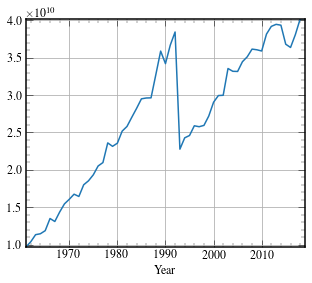

In [204]:
df.loc['Thailand']['CPI'].plot()

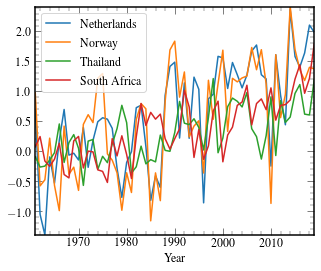

In [43]:
fig,ax = plt.subplots()
(df.loc['Netherlands']['Average Temp'] - df.loc['Netherlands'].iloc[:25]['Average Temp'].mean()).plot(label='Netherlands')
(df.loc['Norway']['Average Temp'] - df.loc['Norway'].iloc[:25]['Average Temp'].mean()).plot(label='Norway')
(df.loc['Thailand']['Average Temp'] - df.loc['Thailand'].iloc[:25]['Average Temp'].mean()).plot(label='Thailand')
(df.loc['South Africa']['Average Temp'] - df.loc['South Africa'].iloc[:25]['Average Temp'].mean()).plot(label='South Africa')
plt.legend()
plt.grid(False)
plt.savefig('TempIncrease4countries.pdf')

In [ ]:
(df.loc['Netherlands']['Average Temp'] - df.loc['Netherlands'].iloc[:25]['Average Temp'].mean()).iloc[-10:].mean()
(df.loc['Norway']['Average Temp'] - df.loc['Norway'].iloc[:25]['Average Temp'].mean()).iloc[-10:].mean()
(df.loc['Thailand']['Average Temp'] - df.loc['Thailand'].iloc[:25]['Average Temp'].mean()).iloc[-10:].mean()
(df.loc['South Africa']['Average Temp'] - df.loc['South Africa'].iloc[:25]['Average Temp'].mean()).iloc[-10:].mean()

In [ ]:
import statsmodels.tsa.stattools as ts
import johansen
# null hypothesis is no cointegration
result = ts.coint(df.loc['Netherlands']['GDP'], df.loc['Netherlands']['Average Temp'])[1]
result

In [206]:
cointegrated = pd.DataFrame()
for country in countries:
    subdf = df.loc[country]
    for col1 in subdf.columns:
        for col2 in subdf.columns:
            x = subdf[col1]
            y = subdf[col2]
            isfinite = np.isfinite(x*y)
            x = x[isfinite]
            y = y[isfinite]
            if col1==col2: continue
            pval = ts.coint(x,y)[1]
            cointegrated = cointegrated.append({'Country':country,'Variable1':col1,'Variable2':col2,'pvalue':pval}, ignore_index=True)
            

In [207]:
#df_cointeg = cointegrated[(cointegrated.pvalue<0.05)&(cointegrated.pvalue>0)][['Country','Variable1', 'Variable2']].set_index('Country')
#df_cointeg['pair'] = [tuple(w) for w in np.sort(df_cointeg.values,axis=1)]
#df_cointeg = df_cointeg.reset_index()[['Country','pair']].drop_duplicates()

In [218]:
cointegrated2 = pd.DataFrame(index=df.columns, columns=df.columns).fillna('')
for i,row in cointegrated.iterrows():
    if row.pvalue<0.05:
        cointegrated2.loc[row.Variable1,row.Variable2] += row.Country[:2]+' '

In [219]:
cointegrated2

,Precipitation,Radiation,Average Temp,GDP,GDP per Capita,Population,Land,CPI
Precipitation,,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So
Radiation,No So,,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So,Ne No Th So
Average Temp,Ne,Ne No Th,,Ne No Th So,Ne No Th So,Ne No Th So,Ne Th,Ne No Th So
GDP,,,So,,,,Ne,
GDP per Capita,,Th,,,,,Ne,
Population,,Th,Ne So,,,,,
Land,,,Ne,Ne,,,,
CPI,,Th,Ne No So,No So,No,No So,No,


In [221]:
df.to_excel('cointegration.xlsx')